In [ ]:
#1PROBLEM INFO

In [ ]:
#to understand the customer purchase behaviour against various products of different categories on black friday sales
#We have received data regarding customer details,purchase info,product details ,and total purchase

In [ ]:
#2DATACOLLECTION

In [ ]:
import pandas as pd   #used to do many of the time consuming, repetitive tasks associated with working with data
import numpy as np     #used when we need to do numerical operations
import matplotlib.pyplot as plt #matplotlib is a library for data visualisation,pyplot makes lib to act as open source matlab
import seaborn as sns   #provides interface for drawing graphs
import warnings  #issues warnings to alert user
from six.moves import urllib
import os
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("train.csv")     #imported data 

In [ ]:
data.head()  #shows first five row & columns in the data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
data.tail()       #shows the last five elements of the data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [ ]:
data.shape        #shows no of (rows,columns)

(550068, 12)

In [ ]:
data.describe()  #shows the numerical data

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
data.info()   #IT CHECKS THE NULL VALUE AND GIVES THE DATATYPES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
#3EXPLORING DATA

In [ ]:
data.columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
#FEATURE INFORMATION

#USER ID :- GIVES THE ID OF USER
#PRODUCT ID:- GIVES THE ID OF PRODUCT PURCHASED
#GENDER:- GANDER OF THE CUSTOMER
#AGE:- AGE OF THE CUSTOMER
#OCCUPATION:-OCCUPATION OF THE USER
#CITY CATEGORY STAY IN CURRENT CITY:-GIVES THE NO OF YEARS THE USER IS STAYED IN THE CITY
#MARITAL STATUS:-MARITAL STATUS OF THE USER
# PRODUCT_CATEGORY_1:-PRODUCT CATEGORY 
# PRODUCT_CATEGORY_2:-PRODUCT MAY BELONGS TO OTHER CATEGORY ALSO 
# PRODUCT_CATEGORY_3:-PRODUCT MAY BELONGS TO OTHER CATEGORY ALSO 
# PURCHASE:-PURCHASE AMOUNT 


In [ ]:
#DEFINING NUMERICAL(which has integers as data) AND CATEGORICAL FEATURES(which has strings as data)     
numeric_features = [feature for feature in data.columns if data[feature].dtype == 'int' or data[feature].dtype == 'float']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
#PRINTING THE FEATURES
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Product_Category_2', 'Product_Category_3']

We have 5 categorical features : ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


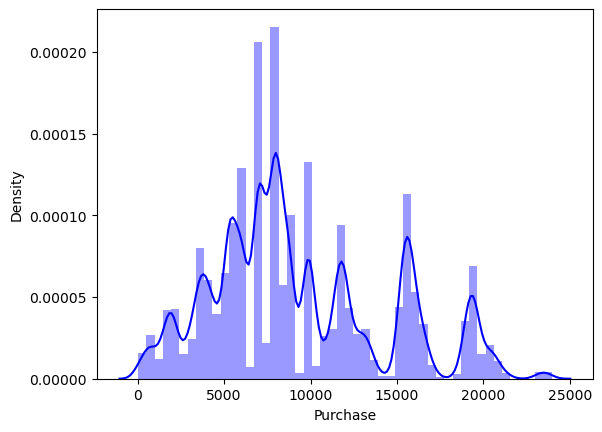

In [ ]:
sns.distplot(data["Purchase"],color='b')#here the distribution is NOT uniform 
plt.show()                                     

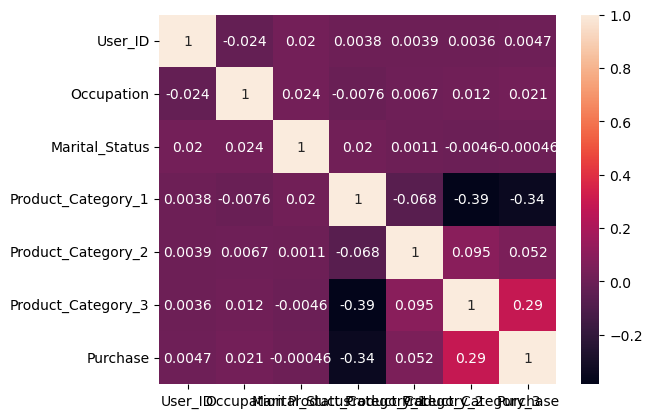

In [ ]:
sns.heatmap(data.corr(),annot=True)
figsize=(15,20)
plt.xticks(rotation=0)
plt.show()

In [ ]:
we can see some corelation between purchase category and purchase

In [ ]:
UNIVARITE ANALYSIS #USING ONLY ONE VARIABLE 

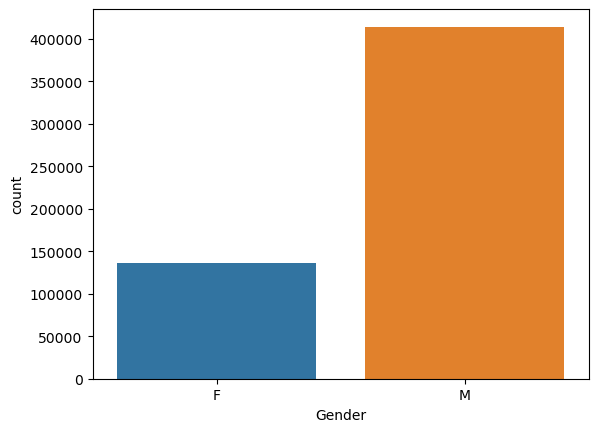

In [ ]:
sns.countplot(data["Gender"])   #DISPLAYS THE VALUES OF GENDER IN THE FORM OF BAR GRAPH
plt.show()

In [ ]:
data['Gender'].value_counts(normalize=True)*100 #gives the actual count of both males and females

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [ ]:
#according to the graph there are more males than females


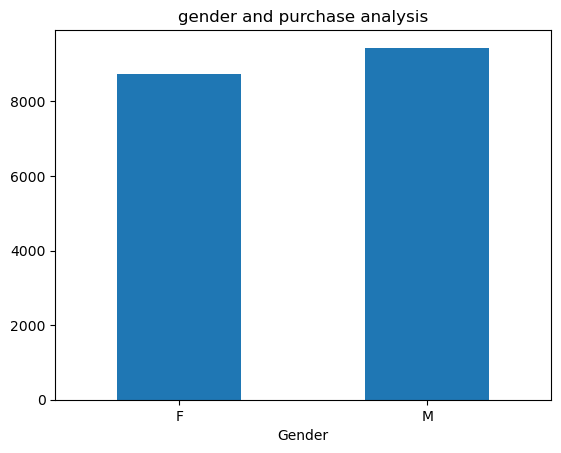

In [ ]:
data.groupby("Gender").mean()["Purchase"].plot(kind='bar')#WE ARE FINDING THE MEAN OF THE PURCHASE OF BOTH MALES AND FEMALES INDIVUDUALLY 
plt.title('gender and purchase analysis')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#the avg of purchase of both male and female is >8000

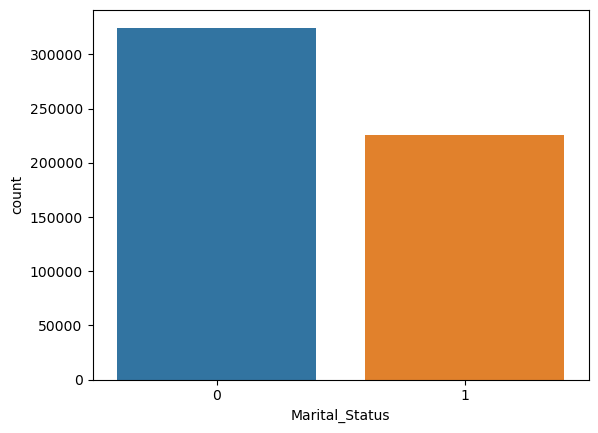

In [ ]:
sns.countplot(data['Marital_Status'])   #DISPLAYS THE VALUES OF MARITAL STATUS AS BAR GRAPH
plt.show()

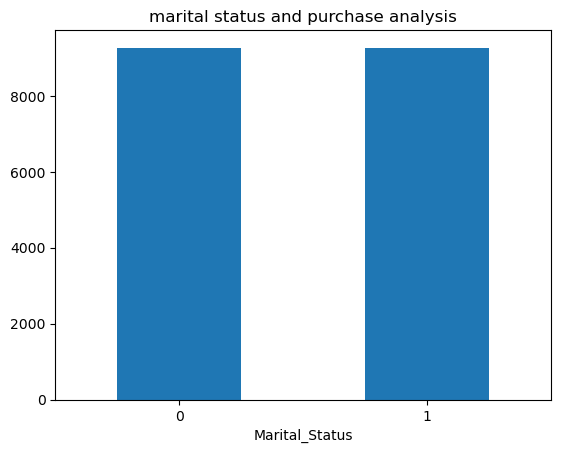

In [ ]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')#GIVES EXACT AVG VALUE OF PURCHASES BASED ON THE MARITAL STATUS
plt.title('marital status and purchase analysis')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#The  AVG PURCHASE OF both married and unmarried is >8000

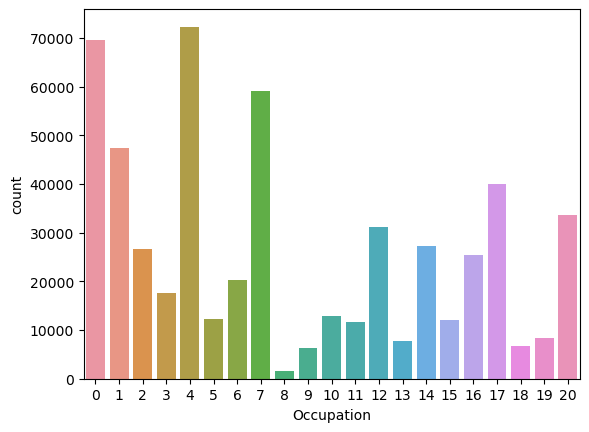

In [ ]:
sns.countplot(data['Occupation'])      #DISPLAYS DIFFERNT OCCUPATIONS IN THE FORM OF BAR GRAPH
plt.show()

In [ ]:
#EVERY OCCUPATION IS HAVING PURCHASE 

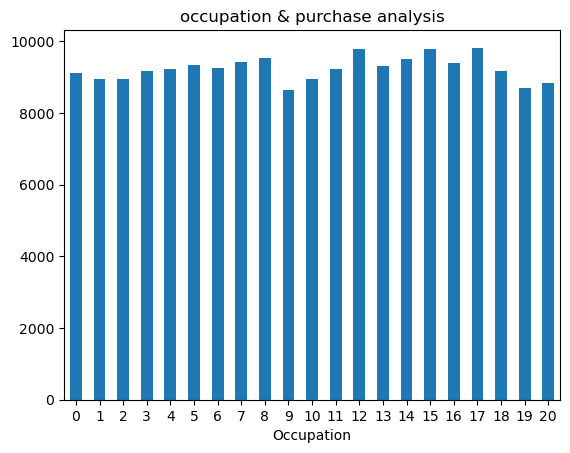

In [ ]:
data.groupby("Occupation").mean()["Purchase"].plot(kind='bar')
plt.title('occupation & purchase analysis')
plt.xticks(rotation=0)
plt.show()

In [ ]:
THE AVERAGE PURCHASE OF EVERY OCCUPATION IS SAME >8000

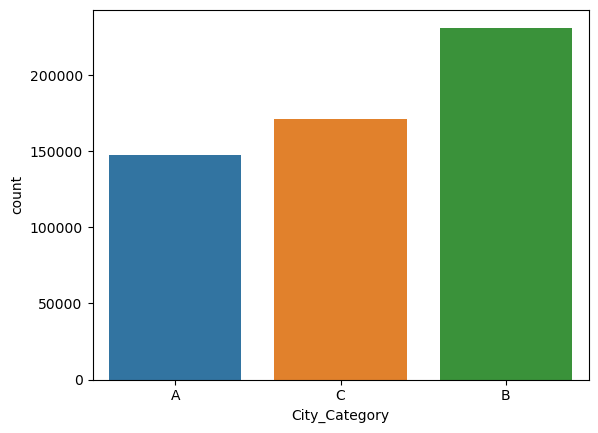

In [ ]:
sns.countplot(data['City_Category'])      #DISPLAYS DIFFERNT CITY CATEGORY IN THE FORM OF BAR GRAPH
plt.show()

In [ ]:
#PURCHASE FROM CITY B>C>A

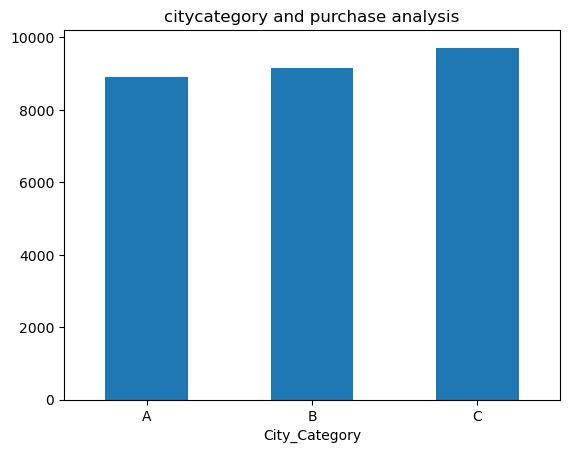

In [ ]:
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')#GIVES EXACT AVG VALUE OF PURCHASES BASED ON DIFFERENT OCCUPATion
plt.title('citycategory and purchase analysis')
plt.xticks(rotation=0)
plt.show()                                                    

In [ ]:
#avg purchase of  all cities  is >8000

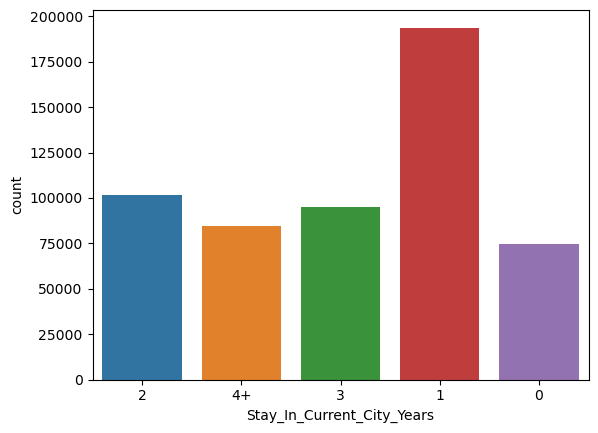

In [ ]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

In [ ]:
#HERE PEOPLE WHO ARE NEW TO HOUSES(STAY IN THE CITY=1) PURCHASE MORE AND TAKE THE BENIFIT OF THE BLACK FRIDAY SALES W.R.T TO THE OTHER PEOPLE



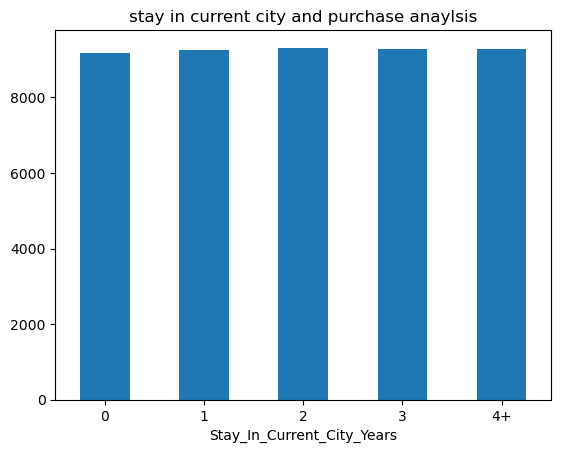

In [ ]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title('stay in current city and purchase anaylsis')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#HOWERVER THE AVERAGE PURCHASES OF PEOPLE >8000

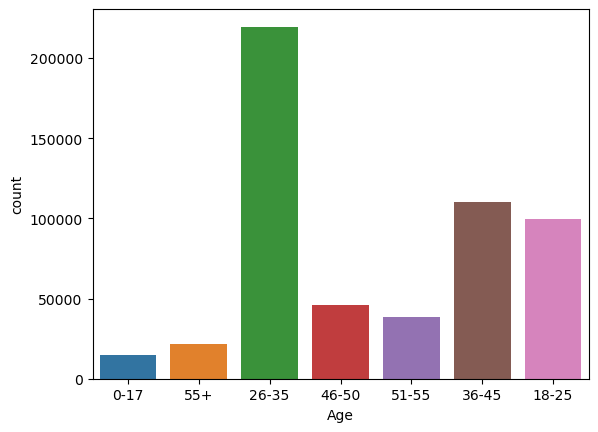

In [ ]:
sns.countplot(data['Age'])
plt.show()

In [ ]:
#THE PURCHASE IS HIGH BETWEEN THE AGE GROUP 26-35 FOLLOWED BY 36-45 AND 18-25 

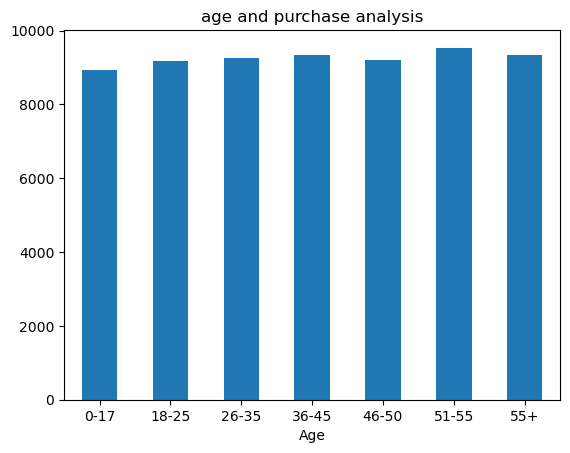

In [ ]:
data.groupby("Age").mean()["Purchase"].plot(kind='bar')
plt.title('age and purchase analysis')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# puchase rate between the age groups tends to be >8000

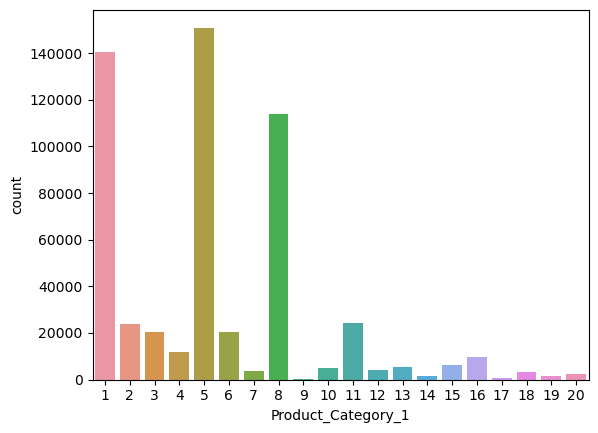

In [ ]:
sns.countplot(data['Product_Category_1'])
plt.show()

In [ ]:
#NUMBER 1,5&8 ARE MORE PURCHASED BUT WE DON'T KNOW WHAT ARE THESE PRODUCTS

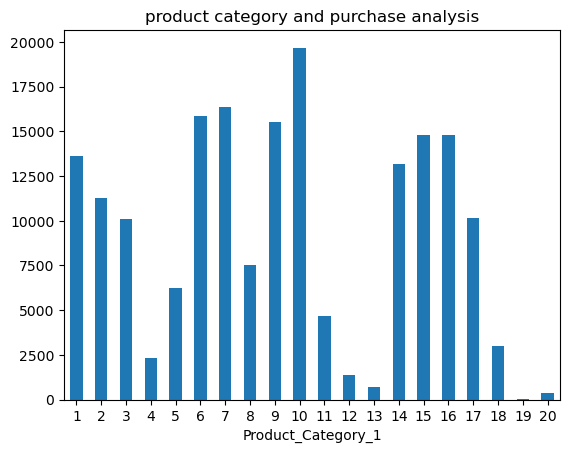

In [ ]:
data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar')
plt.title('product category and purchase analysis')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#ALTHOUGH PRODUCTS 1,5&8 ARE MORE PURCHASED THE AVG OF THEM IS NOT MORE.

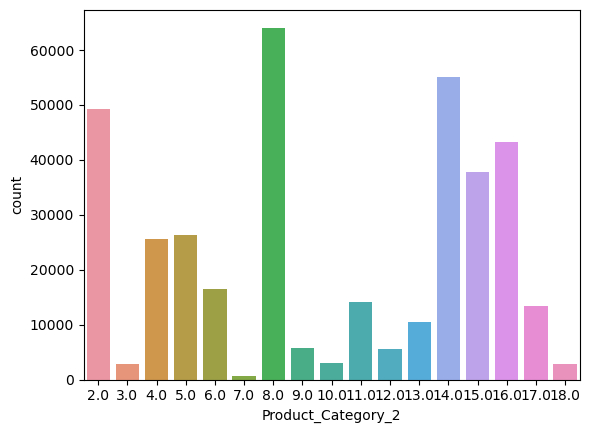

In [ ]:
sns.countplot(data['Product_Category_2'])
plt.show()

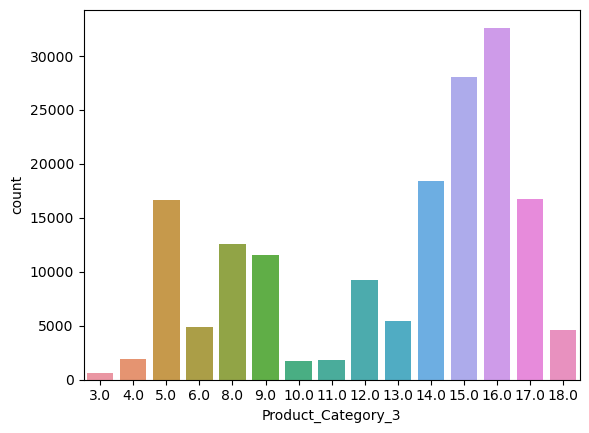

In [ ]:
sns.countplot(data['Product_Category_3'])
plt.show()

In [ ]:
CHECKING FOR NULL VALUES

In [ ]:
data.isnull().sum() #GIVES ALL THE NULL VALUSE AND SUM OF THE NULL VALUES


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
WE HAVE NULL VALUES FOR PRODUCT CATEGORY 2 AND 3

In [ ]:
data['Product_Category_2']= data['Product_Category_2'].fillna(0).astype('float64')
data['Product_Category_3']= data['Product_Category_3'].fillna(0).astype('float64')

In [ ]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
FINAL REPORT:- THE PURCHASE ANALYSIS WITH RESPECT TO AGE,GENDER,MARITAL STATUS AND PRODUCT CATEGORIES
                    IS HAVING A UNIFORM DISTRIBUTION GRAPH W.R.T TO PURCHASE 
        THE PURCHASE IS GREATER THAN 8000